In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = r'C:\Users\USER\Downloads\archive\chest_xray\train'
valid_path = r'C:\Users\USER\Downloads\archive\chest_xray\val'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob( r'C:\Users\USER\Downloads\archive\chest_xray\train\*')

In [7]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/6
163/163 [==============================] - 378s 2s/step - loss: 0.6430 - accuracy: 0.9051 - val_loss: 0.5036 - val_accuracy: 0.6875
Epoch 2/6
163/163 [==============================] - 400s 2s/step - loss: 0.1577 - accuracy: 0.9456 - val_loss: 0.6035 - val_accuracy: 0.6875
Epoch 3/6
163/163 [==============================] - 400s 2s/step - loss: 0.1286 - accuracy: 0.9565 - val_loss: 0.3609 - val_accuracy: 0.6875
Epoch 4/6
163/163 [==============================] - 395s 2s/step - loss: 0.0800 - accuracy: 0.9705 - val_loss: 0.3057 - val_accuracy: 0.8750
Epoch 5/6
163/163 [==============================] - 386s 2s/step - loss: 0.0784 - accuracy: 0.9711 - val_loss: 0.1708 - val_accuracy: 0.9375
Epoch 6/6
163/163 [==============================] - 387s 2s/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.1293 - val_accuracy: 0.9375


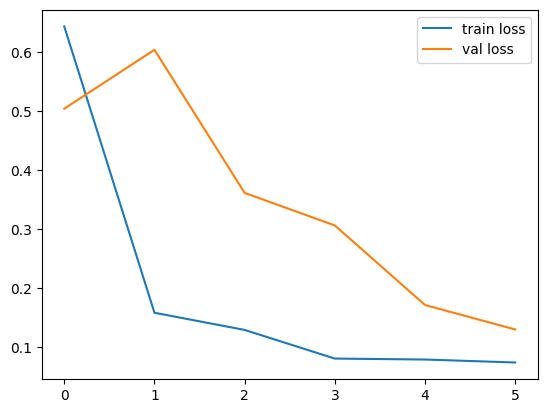

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


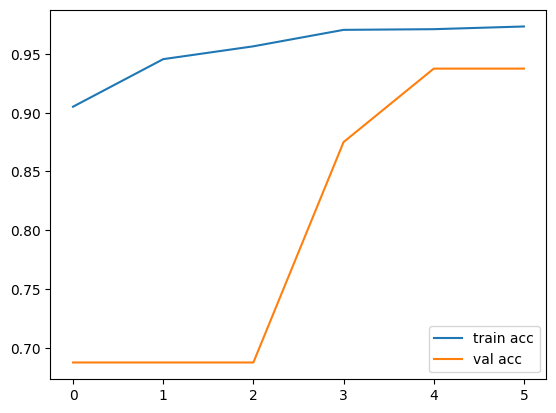

<Figure size 640x480 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



from keras.models import load_model

model.save('model_vgg19.h5')

In [17]:
from keras.models import load_model

model.save('model_vgg19.h5')